In [27]:
# Importing libraries
import pandas as pd
import os

In [28]:
# 전처리 불량량 Loading
Defect_df = pd.read_excel('pre_defect_303F.xlsx')
# 전처리 투입량 Loading
Input_df = pd.read_excel('pre_input_303F.xlsx')

In [29]:
Input_df.head()

,압연년,압연월,년월,HEAT_NO,LOT_NO,공정코드,구분,공장명,주조구분,재료코드,...,STRAND_SEQ,주조완료일,주여구분,지시GR종류,생산GR종류,생산GR공정,제강검사완료일,작업일,강관소재여부,주설비구분
0,2023,8,202308,S54745,B360553701,9Y01,압연,산세,T,7730.0,...,NaN,2023-06-26,1,A,A,8301,2023-06-27,2023-10-04,N,C
1,2023,8,202308,S54745,B360553901,9Y01,압연,산세,T,7730.0,...,NaN,2023-06-26,1,A,A,8301,2023-06-27,2023-10-04,N,C
2,2023,2,202302,S52717,B310559703,9Y01,압연,산세,T,7730.0,...,NaN,2023-01-02,1,A,A,8301,2023-01-04,2023-02-20,N,W
3,2023,2,202302,S52717,B310559702,9Y01,압연,산세,T,7730.0,...,NaN,2023-01-02,1,A,A,8301,2023-01-04,2023-02-20,N,W
4,2023,2,202302,S52717,B310559701,9Y01,압연,산세,T,7730.0,...,NaN,2023-01-02,1,A,A,8301,2023-01-04,2023-02-20,N,W


In [30]:
# Convert string column to year-month format
def convert_to_year_month(value):
    if isinstance(value, int):
        year = str(value)[:4]
        month = str(value)[4:]
        return f'{year}-{month.zfill(2)}'
    elif isinstance(value, str):
        year = value[:4]
        month = value[4:]
        return f'{year}-{month.zfill(2)}'
    else:
        return value

Input_df['년월'] = Input_df['년월'].apply(convert_to_year_month)

def convert_to_Rolling_year_month_date(date):
    year = date.year
    month = date.month
    return f'{year}-{month:02}' 


Input_df['압연년월'] = Input_df['최종압연일자'].apply(convert_to_Rolling_year_month_date)

# 압연년월을 datetime으로 변환 후 연도-월만 추출
Input_df['압연년월'] = pd.to_datetime(Input_df['압연년월']).dt.strftime('%Y-%m')

# 압연년월+heat_no
Input_df['압연년월_Heat'] = Input_df['압연년월']+'_'+Input_df['HEAT_NO'].astype(str)

Input_df.head()

,압연년,압연월,년월,HEAT_NO,LOT_NO,공정코드,구분,공장명,주조구분,재료코드,...,주여구분,지시GR종류,생산GR종류,생산GR공정,제강검사완료일,작업일,강관소재여부,주설비구분,압연년월,압연년월_Heat
0,2023,8,2023-08,S54745,B360553701,9Y01,압연,산세,T,7730.0,...,1,A,A,8301,2023-06-27,2023-10-04,N,C,2023-08,2023-08_S54745
1,2023,8,2023-08,S54745,B360553901,9Y01,압연,산세,T,7730.0,...,1,A,A,8301,2023-06-27,2023-10-04,N,C,2023-08,2023-08_S54745
2,2023,2,2023-02,S52717,B310559703,9Y01,압연,산세,T,7730.0,...,1,A,A,8301,2023-01-04,2023-02-20,N,W,2023-02,2023-02_S52717
3,2023,2,2023-02,S52717,B310559702,9Y01,압연,산세,T,7730.0,...,1,A,A,8301,2023-01-04,2023-02-20,N,W,2023-02,2023-02_S52717
4,2023,2,2023-02,S52717,B310559701,9Y01,압연,산세,T,7730.0,...,1,A,A,8301,2023-01-04,2023-02-20,N,W,2023-02,2023-02_S52717


In [31]:
Defect_df.head()

,압연년,압연월,년월일,업무구분,공장구분,HEAT_NO,LOT_NO,PON,공정순위,주조구분,...,압연일자4,압연외경4,압연폭4,최종압연공정,최종압연일자,제품압연작업조,생성일시,HCR,투입중량,주설비구분
0,2024,4,2024-04-29,2,9,S55761,B3A0481500,D24W3W1444,100,T,...,NaN,0,0,8100,2024-04-22,B,2024-05-03,NaN,NaN,C
1,2024,4,2024-04-29,2,9,S55761,B3A0481500,D24W3W1444,100,T,...,NaN,0,0,8100,2024-04-22,B,2024-05-03,NaN,NaN,C
2,2023,8,2023-09-11,2,9,S54745,B360553802,D23W8W1198,120,T,...,NaN,0,0,8100,2023-08-28,C,2023-10-05,NaN,NaN,C
3,2023,10,2023-10-26,2,9,S55018,B370540802,D23WAW0353,90,T,...,NaN,0,0,8100,2023-10-11,C,2023-11-02,NaN,NaN,W
4,2023,10,2023-10-26,2,9,S55018,B370540802,D23WAW0353,90,T,...,NaN,0,0,8100,2023-10-11,C,2023-11-02,NaN,NaN,W


In [32]:
def convert_to_year_month_date(date):
    year, month, _ = date.split('-')
    return f'{year}-{month}'

def convert_to_Rolling_year_month_date(date):
    year = date.year
    month = date.month
    return f'{year}-{month:02}' 

Defect_df['년월'] = Defect_df['년월일'].apply(convert_to_year_month_date)
Defect_df['압연년월'] = Defect_df['최종압연일자'].apply(convert_to_Rolling_year_month_date)

# 압연년월을 datetime으로 변환 후 연도-월만 추출
Defect_df['압연년월'] = pd.to_datetime(Defect_df['압연년월']).dt.strftime('%Y-%m')

# 압연년월+heat_no
Defect_df['압연년월_Heat'] = Defect_df['압연년월']+'_'+Defect_df['HEAT_NO'].astype(str)

# 년월은 년월일 컬럼 앞에 배치
position = Defect_df.columns.get_loc('년월일')
Defect_df.insert(position, '년월', Defect_df.pop('년월'))

Defect_df.head()

,압연년,압연월,년월,년월일,업무구분,공장구분,HEAT_NO,LOT_NO,PON,공정순위,...,압연폭4,최종압연공정,최종압연일자,제품압연작업조,생성일시,HCR,투입중량,주설비구분,압연년월,압연년월_Heat
0,2024,4,2024-04,2024-04-29,2,9,S55761,B3A0481500,D24W3W1444,100,...,0,8100,2024-04-22,B,2024-05-03,NaN,NaN,C,2024-04,2024-04_S55761
1,2024,4,2024-04,2024-04-29,2,9,S55761,B3A0481500,D24W3W1444,100,...,0,8100,2024-04-22,B,2024-05-03,NaN,NaN,C,2024-04,2024-04_S55761
2,2023,8,2023-09,2023-09-11,2,9,S54745,B360553802,D23W8W1198,120,...,0,8100,2023-08-28,C,2023-10-05,NaN,NaN,C,2023-08,2023-08_S54745
3,2023,10,2023-10,2023-10-26,2,9,S55018,B370540802,D23WAW0353,90,...,0,8100,2023-10-11,C,2023-11-02,NaN,NaN,W,2023-10,2023-10_S55018
4,2023,10,2023-10,2023-10-26,2,9,S55018,B370540802,D23WAW0353,90,...,0,8100,2023-10-11,C,2023-11-02,NaN,NaN,W,2023-10,2023-10_S55018


In [33]:
# 기간 설정
start_date = pd.to_datetime('2023-01')  # None for no filter,or # '2023-01'
end_date = pd.to_datetime('2024-09')    # None for no filter,or # '2023-08'

# 기간 설정의 범위 결정()
if start_date is None or end_date is None:
    min_date = min(Input_df['압연년월'].min(), Defect_df['압연년월'].min())
    max_date = max(Input_df['압연년월'].max(), Defect_df['압연년월'].max())
    if start_date is None:
        start_date = min_date
    if end_date is None:
        end_date = max_date

# Convert the 'Year Month' column in Input_df and Defect_df to datetime if it's not already
Input_df['압연년월'] = pd.to_datetime(Input_df['압연년월'])
Defect_df['압연년월'] = pd.to_datetime(Defect_df['압연년월'])
#Scrap_df['압연년월'] = pd.to_datetime(Scrap_df['압연년월'])

# 기간 필터 적용
Input_df = Input_df[(Input_df['압연년월'] >= start_date) & (Input_df['압연년월'] <= end_date)]
Defect_df = Defect_df[(Defect_df['압연년월'] >= start_date) & (Defect_df['압연년월'] <= end_date)]
#Scrap_df = Scrap_df[(Scrap_df['압연년월'] >= start_date) & (Scrap_df['압연년월'] <= end_date)]


# 여러 개의 필터 조건 설정
steel_grade_filters = ['STS303FS8'] #'316LDS1','316LDSB','STS304HCS5','STS304SX'
out_dia_filters =[]
defects_filters =['SEAM','SEAM+터짐', 'SEAM+종크랙','터짐','종크랙','SCAB','줄파임'] #'SEAM','SEAM+터짐', 'SEAM+종크랙','터짐','종크랙'


# 필터링 조건 생성(1)- apply_filters
def apply_filters(dataframe):
    if steel_grade_filters:
        grade_condition = dataframe['사내강종명'].isin(steel_grade_filters)
    else:
        grade_condition = pd.Series(True, index=dataframe.index)  # 모든 행에 대해 True로 설정

    if out_dia_filters:
        dia_condition = dataframe['외경'].isin(out_dia_filters)
    else:
        dia_condition = pd.Series(True, index=dataframe.index)  # 모든 행에 대해 True로 설정
    
    return grade_condition & dia_condition 

# 필터링 조건 생성(2) - apply_filters_2
def apply_filters_2(dataframe):
    if steel_grade_filters:
        grade_condition = dataframe['사내강종명'].isin(steel_grade_filters)
    else:
        grade_condition = pd.Series(True, index=dataframe.index)  # 모든 행에 대해 True로 설정

    if out_dia_filters:
        dia_condition = dataframe['외경'].isin(out_dia_filters)
    else:
        dia_condition = pd.Series(True, index=dataframe.index)  # 모든 행에 대해 True로 설정

    if defects_filters:
        defects_condition = dataframe['이상코드명'].isin(defects_filters)
    else:
        defects_condition = pd.Series(True, index=dataframe.index)  # 모든 행에 대해 True로 설정
    
    return grade_condition & dia_condition & defects_condition

# 필터링된 결과 출력(덮어쓰기 했음!)
Input_df = Input_df[apply_filters(Input_df)]
Defect_df = Defect_df[apply_filters_2(Defect_df)]
#Scrap_df = Scrap_df[apply_filters_2(Scrap_df)]

#--------------------------------------------------------------------------------------------------------------------
# 1번 HEAT별 merged_df
# Group by year and month, sum the '투입중량' and '발생중량'
grouped_input = Input_df.groupby('HEAT_NO')['투입중량'].sum().reset_index()
grouped_defect = Defect_df.groupby('HEAT_NO')['발생중량'].sum().reset_index()
#grouped_scrap = Scrap_df.groupby('HEAT_NO')['폐기중량'].sum().reset_index()

# Merge input and defect data on 'Roll_Yr_Mth'
merged_df = pd.merge(grouped_input, grouped_defect, on='HEAT_NO', how='left')
#merged_df = pd.merge(merged_df, grouped_scrap, on='HEAT_NO', how='left')

# Fill missing defect values with 0
merged_df['발생중량'] = merged_df['발생중량'].fillna(0)
#merged_df['폐기중량'] = merged_df['폐기중량'].fillna(0)

# Calculate defect rate
merged_df['불량율'] = (merged_df['발생중량'] / merged_df['투입중량']) * 100
#merged_df['폐기율'] = (merged_df['폐기중량'] / merged_df['투입중량']) * 100

#merged_df.head()
# Create a new column '년-월' with formatted year and month
#merged_df['압연년월'] = merged_df['압연년월'].dt.year.astype(str) + '-' + merged_df['압연년월'].dt.month.astype(str)

# Print the merged DataFrame with defect rate
# print(merged_df)

#--------------------------------------------------------------------------------------------------------------------
# 2번 압연년월 merged_df2
# Group by year and month, sum the '투입중량' and '발생중량'
grouped_input2 = Input_df.groupby('압연년월')['투입중량'].sum().reset_index()
grouped_defect2 = Defect_df.groupby('압연년월')['발생중량'].sum().reset_index()
#grouped_scrap2 = Scrap_df.groupby('압연년월')['폐기중량'].sum().reset_index()

# Merge input and defect data on 'Roll_Yr_Mth'
merged_df2 = pd.merge(grouped_input2, grouped_defect2, on='압연년월', how='left')
#merged_df2 = pd.merge(merged_df2, grouped_scrap2, on='압연년월', how='left')

# Fill missing defect values with 0
merged_df2['발생중량'] = merged_df2['발생중량'].fillna(0)
#merged_df2['폐기중량'] = merged_df2['폐기중량'].fillna(0)

# Calculate defect rate
merged_df2['불량율'] = (merged_df2['발생중량'] / merged_df2['투입중량']) * 100

#--------------------------------------------------------------------------------------------------------------------
# 3번 압연년월_Heat_no merged_df3
# Group by year and month, sum the '투입중량' and '발생중량'
grouped_input3 = Input_df.groupby('압연년월_Heat')['투입중량'].sum().reset_index()
grouped_defect3 = Defect_df.groupby('압연년월_Heat')['발생중량'].sum().reset_index()
#grouped_scrap3 = Scrap_df.groupby('압연년월_Heat')['폐기중량'].sum().reset_index()

# Merge input and defect data on 'Roll_Yr_Mth'
merged_df3 = pd.merge(grouped_input3, grouped_defect3, on='압연년월_Heat', how='left')
#merged_df3 = pd.merge(merged_df3, grouped_scrap3, on='압연년월_Heat', how='left')

# Fill missing defect values with 0
merged_df3['발생중량'] = merged_df3['발생중량'].fillna(0)
#merged_df3['폐기중량'] = merged_df3['폐기중량'].fillna(0)

# Calculate defect rate
merged_df3['불량율'] = (merged_df3['발생중량'] / merged_df3['투입중량']) * 100

In [34]:
merged_df

,HEAT_NO,투입중량,발생중량,불량율
0,S45408,3182,0.0,0.000000
1,S47024,31820,2606.0,8.189818
2,S51697,6396,1397.0,21.841776
3,S51698,6396,0.0,0.000000
4,S52032,3198,0.0,0.000000
...,...,...,...,...
56,S58557,47970,1410.0,2.939337
57,S58558,84746,8377.0,9.884832
58,S58559,97148,1635.0,1.682999
59,S58821,73549,5928.0,8.059933


In [35]:
#투입중량, 발생중량을 톤으로 변경
merged_df['투입중량'] = merged_df['투입중량'] / 1000
merged_df['발생중량'] = merged_df['발생중량'] / 1000
#merged_df['폐기중량'] = merged_df['폐기중량'] / 1000

merged_df

,HEAT_NO,투입중량,발생중량,불량율
0,S45408,3.182,0.000,0.000000
1,S47024,31.820,2.606,8.189818
2,S51697,6.396,1.397,21.841776
3,S51698,6.396,0.000,0.000000
4,S52032,3.198,0.000,0.000000
...,...,...,...,...
56,S58557,47.970,1.410,2.939337
57,S58558,84.746,8.377,9.884832
58,S58559,97.148,1.635,1.682999
59,S58821,73.549,5.928,8.059933


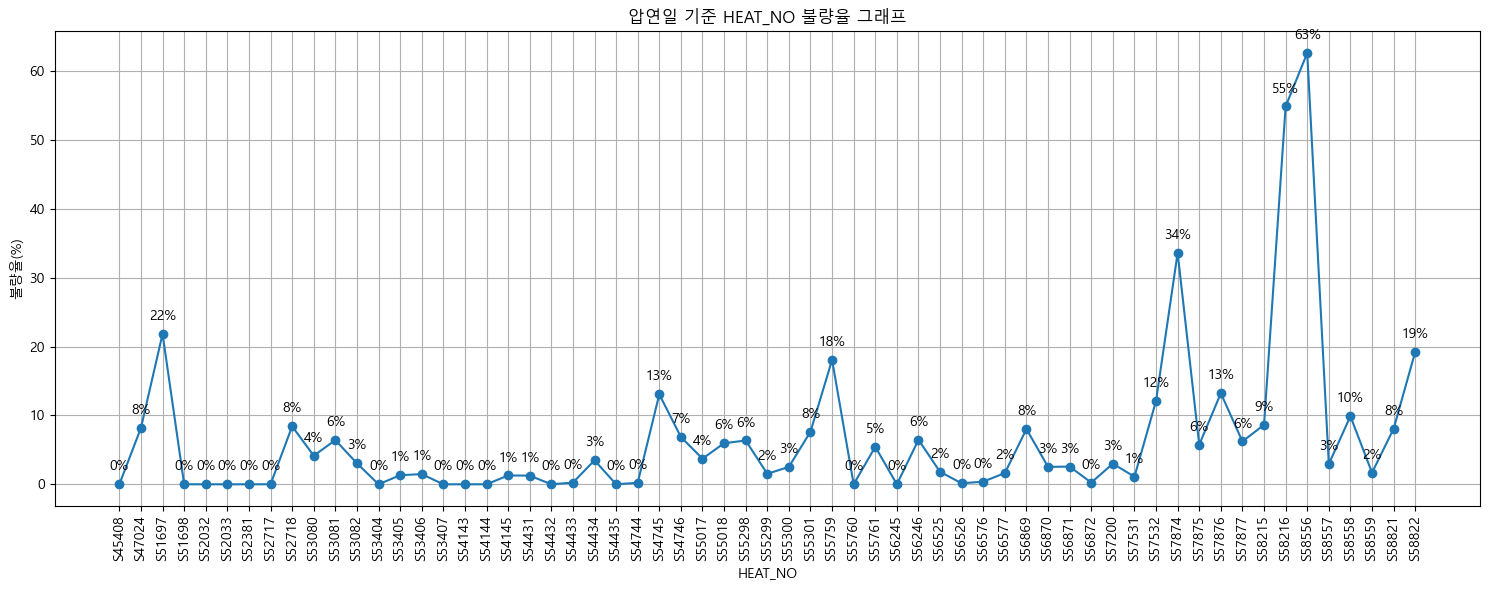

In [36]:
#불량율 그래프(1)
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# Set font for Korean characters
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 한글 폰트 파일 경로를 입력해주세요
font_name = font_manager.FontProperties(fname=font_path).get_name() # 폰트 이름 얻어오기
rc('font', family=font_name) # 그래프에 한글 폰트 적용하기

# Plot the defect rate line chart
plt.figure(figsize=(15, 6))
plt.plot(merged_df['HEAT_NO'], merged_df['불량율'], marker='o')
plt.xlabel('HEAT_NO')
plt.ylabel('불량율(%)')
plt.title('압연일 기준 HEAT_NO 불량율 그래프')
plt.xticks(rotation=90)
plt.grid(True)

# Annotate each point with the defect rate
for i, row in merged_df.iterrows():
    plt.annotate(f'{row["불량율"]:.0f}%', (row['HEAT_NO'], row['불량율']),
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()

# Show the plot
plt.show()

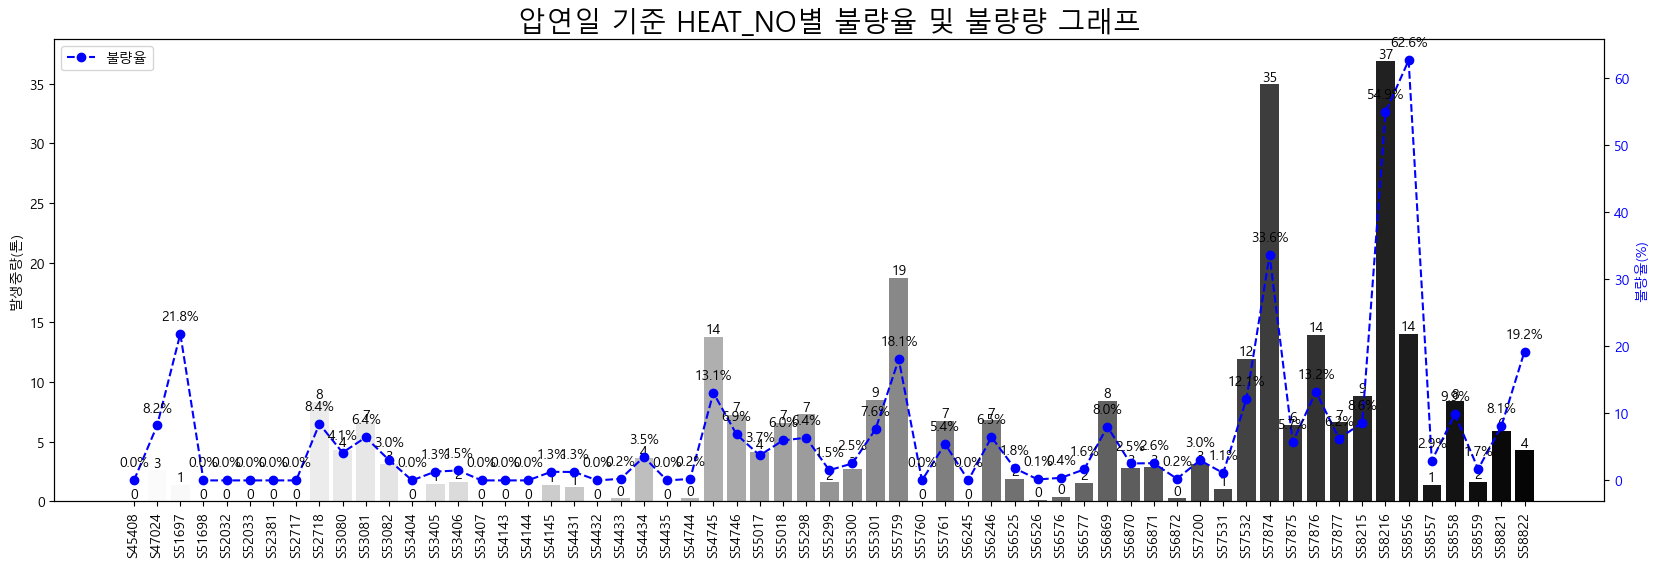

In [37]:
#불량율 그래프(2)
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

# Set font for Korean characters
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 한글 폰트 파일 경로를 입력해주세요
font_name = font_manager.FontProperties(fname=font_path).get_name() # 폰트 이름 얻어오기
rc('font', family=font_name) # 그래프에 한글 폰트 적용하기

# 1. 데이터 준비
x = merged_df['HEAT_NO']
y1 = merged_df['불량율']
y2 = merged_df['발생중량']


# 2. 기본 스타일 및 그래프 그리기
fig = plt.figure(figsize=(20,6)) ## Figure 생성 
fig.set_facecolor('white') ## Figure 배경색 지정
ax1 = fig.add_subplot() ## axes 생성
 
colors = sns.color_palette('Greys', len(x)) ## 바 차트 색상
 
xtick_label_position = list(range(len(x))) ## x축 눈금 라벨이 표시될 x좌표
ax1.set_xticks(xtick_label_position) ## x축 눈금 
ax1.set_xticklabels(x, rotation=90) ## x축 눈금 라벨
ax1.bar(xtick_label_position, y2, color=colors) ## 바차트 출력
ax1.set_ylabel('발생중량(톤)')  # ax1에 y축 라벨 추가
 
color = 'blue'
ax2 = ax1.twinx() ## 새로운 axis 생성
ax2.plot(xtick_label_position, y1, color=color, linestyle='--', marker='o', label ='불량율') ## 선 그래프 
ax2.tick_params(axis='y', labelcolor=color) ## 눈금 라벨 색상 지정
ax2.set_ylabel('불량율(%)', color=color)

# Combine legends for both axes
lines, labels = ax2.get_legend_handles_labels()
bars = ax1.patches
plots = lines + [bars[0]]  # Adding the first bar patch to the legend for clarity
ax1.legend(plots, labels, loc='upper left')

# 불량중량 값을 바 위에 표시
for i, val in enumerate(y2):
    ax1.annotate(f'{val:.0f}', (xtick_label_position[i], val), textcoords="offset points", xytext=(0, 5), ha='center', va='center')

# 불량율 값을 선 위에 표시
for i, val in enumerate(y1):
    ax2.annotate(f'{val:.1f}%', (xtick_label_position[i], val), textcoords="offset points", xytext=(0, 10), ha='center')
 
plt.title('압연일 기준 HEAT_NO별 불량율 및 불량량 그래프', fontsize=20)

# 그래프 저장 경로 설정
save_dir = 'HEAT불량'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 그래프 파일명 설정
file_name = 'HEAT불량.png'
save_path = os.path.join(save_dir, file_name)

# 그래프 저장
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

In [38]:
merged_df2

,압연년월,투입중량,발생중량,불량율
0,2023-01-01,250883,12348,4.921816
1,2023-02-01,325759,9811,3.011736
2,2023-03-01,198276,4310,2.173738
3,2023-04-01,278226,3127,1.123906
4,2023-05-01,377960,1393,0.368558
5,2023-06-01,341945,250,0.073111
6,2023-07-01,146867,2396,1.631408
7,2023-08-01,218208,21025,9.635302
8,2023-09-01,231461,4320,1.866405
9,2023-10-01,254044,14201,5.589977


In [39]:
# 압연년월을 datetime으로 변환 후 연도-월만 추출
merged_df2['압연년월'] = pd.to_datetime(merged_df2['압연년월']).dt.strftime('%Y-%m')
merged_df2

,압연년월,투입중량,발생중량,불량율
0,2023-01,250883,12348,4.921816
1,2023-02,325759,9811,3.011736
2,2023-03,198276,4310,2.173738
3,2023-04,278226,3127,1.123906
4,2023-05,377960,1393,0.368558
5,2023-06,341945,250,0.073111
6,2023-07,146867,2396,1.631408
7,2023-08,218208,21025,9.635302
8,2023-09,231461,4320,1.866405
9,2023-10,254044,14201,5.589977


In [40]:
#투입중량, 발생중량을 톤으로 변경
merged_df2['투입중량'] = merged_df2['투입중량'] / 1000
merged_df2['발생중량'] = merged_df2['발생중량'] / 1000
#merged_df2['폐기중량'] = merged_df2['폐기중량'] / 1000

merged_df2

,압연년월,투입중량,발생중량,불량율
0,2023-01,250.883,12.348,4.921816
1,2023-02,325.759,9.811,3.011736
2,2023-03,198.276,4.310,2.173738
3,2023-04,278.226,3.127,1.123906
4,2023-05,377.960,1.393,0.368558
5,2023-06,341.945,0.250,0.073111
6,2023-07,146.867,2.396,1.631408
7,2023-08,218.208,21.025,9.635302
8,2023-09,231.461,4.320,1.866405
9,2023-10,254.044,14.201,5.589977


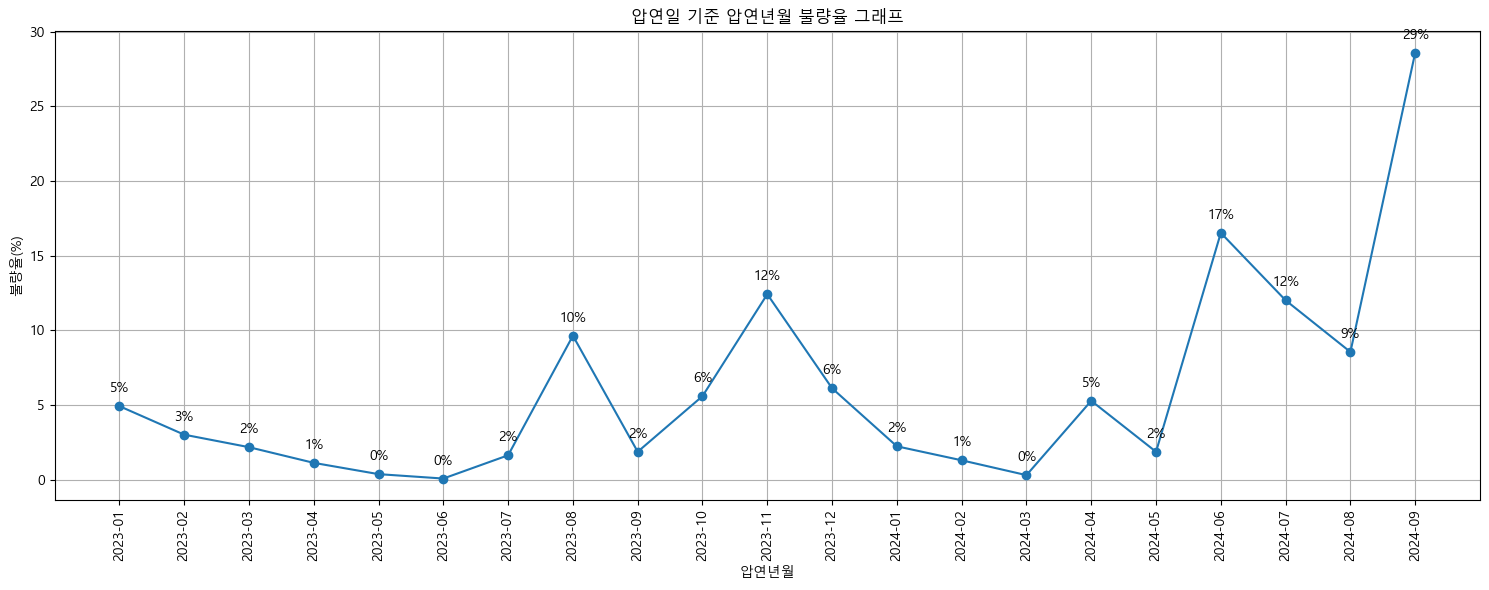

In [41]:
#불량율 그래프(1)
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# Set font for Korean characters
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 한글 폰트 파일 경로를 입력해주세요
font_name = font_manager.FontProperties(fname=font_path).get_name() # 폰트 이름 얻어오기
rc('font', family=font_name) # 그래프에 한글 폰트 적용하기

# Plot the defect rate line chart
plt.figure(figsize=(15, 6))
plt.plot(merged_df2['압연년월'], merged_df2['불량율'], marker='o')
plt.xlabel('압연년월')
plt.ylabel('불량율(%)')
plt.title('압연일 기준 압연년월 불량율 그래프')
plt.xticks(rotation=90)
plt.grid(True)

# Annotate each point with the defect rate
for i, row in merged_df2.iterrows():
    plt.annotate(f'{row["불량율"]:.0f}%', (row['압연년월'], row['불량율']),
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()

# Show the plot
plt.show()

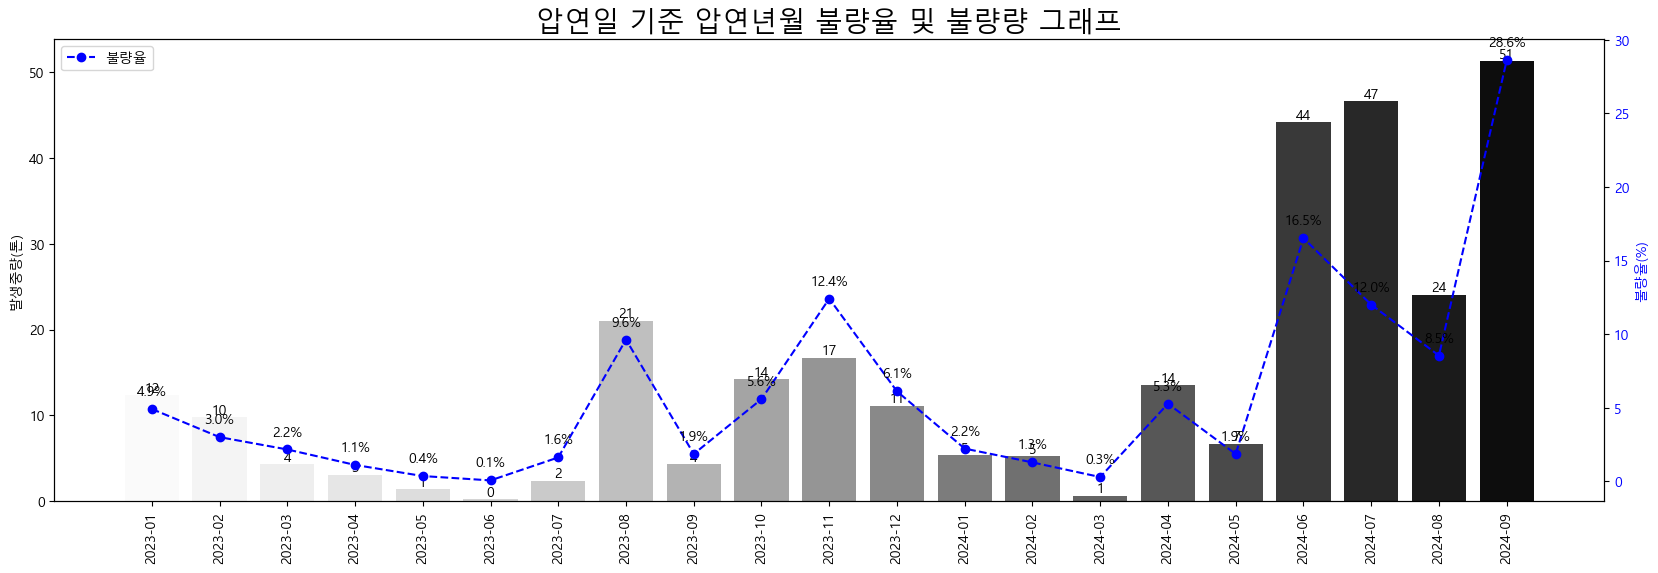

In [47]:
#불량율 그래프(2)
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

# Set font for Korean characters
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 한글 폰트 파일 경로를 입력해주세요
font_name = font_manager.FontProperties(fname=font_path).get_name() # 폰트 이름 얻어오기
rc('font', family=font_name) # 그래프에 한글 폰트 적용하기

# 1. 데이터 준비
x = merged_df2['압연년월']
y1 = merged_df2['불량율']
y2 = merged_df2['발생중량']


# 2. 기본 스타일 및 그래프 그리기
fig = plt.figure(figsize=(20,6)) ## Figure 생성 
fig.set_facecolor('white') ## Figure 배경색 지정
ax1 = fig.add_subplot() ## axes 생성
 
colors = sns.color_palette('Greys', len(x)) ## 바 차트 색상
 
xtick_label_position = list(range(len(x))) ## x축 눈금 라벨이 표시될 x좌표
ax1.set_xticks(xtick_label_position) ## x축 눈금 
ax1.set_xticklabels(x, rotation=90) ## x축 눈금 라벨
ax1.bar(xtick_label_position, y2, color=colors) ## 바차트 출력
ax1.set_ylabel('발생중량(톤)')  # ax1에 y축 라벨 추가
 
color = 'blue'
ax2 = ax1.twinx() ## 새로운 axis 생성
ax2.plot(xtick_label_position, y1, color=color, linestyle='--', marker='o', label ='불량율') ## 선 그래프 
ax2.tick_params(axis='y', labelcolor=color) ## 눈금 라벨 색상 지정
ax2.set_ylabel('불량율(%)', color=color)

# Combine legends for both axes
lines, labels = ax2.get_legend_handles_labels()
bars = ax1.patches
plots = lines + [bars[0]]  # Adding the first bar patch to the legend for clarity
ax1.legend(plots, labels, loc='upper left')

# 불량중량 값을 바 위에 표시
for i, val in enumerate(y2):
    ax1.annotate(f'{val:.0f}', (xtick_label_position[i], val), textcoords="offset points", xytext=(0, 5), ha='center', va='center')

# 불량율 값을 선 위에 표시
for i, val in enumerate(y1):
    ax2.annotate(f'{val:.1f}%', (xtick_label_position[i], val), textcoords="offset points", xytext=(0, 10), ha='center')
 
plt.title('압연일 기준 압연년월 불량율 및 불량량 그래프', fontsize=20)

# 그래프 저장 경로 설정
save_dir = 'HEAT불량'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 그래프 파일명 설정
file_name = '압연월별 불량.png'
save_path = os.path.join(save_dir, file_name)

# 그래프 저장
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

In [43]:
merged_df3

,압연년월_Heat,투입중량,발생중량,불량율
0,2023-01_S47024,31820,2606.0,8.189818
1,2023-01_S51697,6396,1397.0,21.841776
2,2023-01_S52032,3198,0.0,0.000000
3,2023-01_S52033,44772,0.0,0.000000
4,2023-01_S52381,67158,0.0,0.000000
...,...,...,...,...
126,2024-09_S58216,63966,36858.0,57.621236
127,2024-09_S58556,1599,0.0,0.000000
128,2024-09_S58558,17588,4111.0,23.373891
129,2024-09_S58821,73549,5928.0,8.059933


In [44]:
#투입중량, 발생중량을 톤으로 변경
merged_df3['투입중량'] = merged_df3['투입중량'] / 1000
merged_df3['발생중량'] = merged_df3['발생중량'] / 1000
#merged_df3['폐기중량'] = merged_df3['폐기중량'] / 1000

merged_df3

,압연년월_Heat,투입중량,발생중량,불량율
0,2023-01_S47024,31.820,2.606,8.189818
1,2023-01_S51697,6.396,1.397,21.841776
2,2023-01_S52032,3.198,0.000,0.000000
3,2023-01_S52033,44.772,0.000,0.000000
4,2023-01_S52381,67.158,0.000,0.000000
...,...,...,...,...
126,2024-09_S58216,63.966,36.858,57.621236
127,2024-09_S58556,1.599,0.000,0.000000
128,2024-09_S58558,17.588,4.111,23.373891
129,2024-09_S58821,73.549,5.928,8.059933


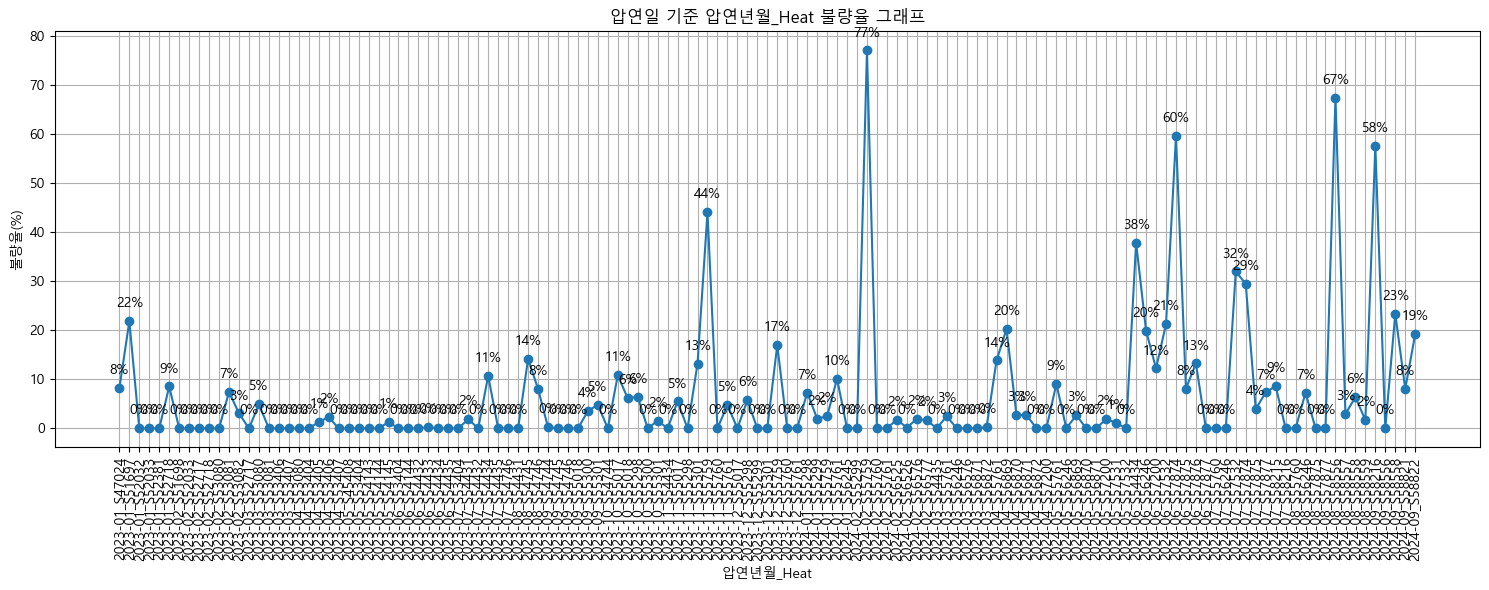

In [45]:
#불량율 그래프(1)
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# Set font for Korean characters
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 한글 폰트 파일 경로를 입력해주세요
font_name = font_manager.FontProperties(fname=font_path).get_name() # 폰트 이름 얻어오기
rc('font', family=font_name) # 그래프에 한글 폰트 적용하기

# Plot the defect rate line chart
plt.figure(figsize=(15, 6))
plt.plot(merged_df3['압연년월_Heat'], merged_df3['불량율'], marker='o')
plt.xlabel('압연년월_Heat')
plt.ylabel('불량율(%)')
plt.title('압연일 기준 압연년월_Heat 불량율 그래프')
plt.xticks(rotation=90)
plt.grid(True)

# Annotate each point with the defect rate
for i, row in merged_df3.iterrows():
    plt.annotate(f'{row["불량율"]:.0f}%', (row['압연년월_Heat'], row['불량율']),
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()

# Show the plot
plt.show()

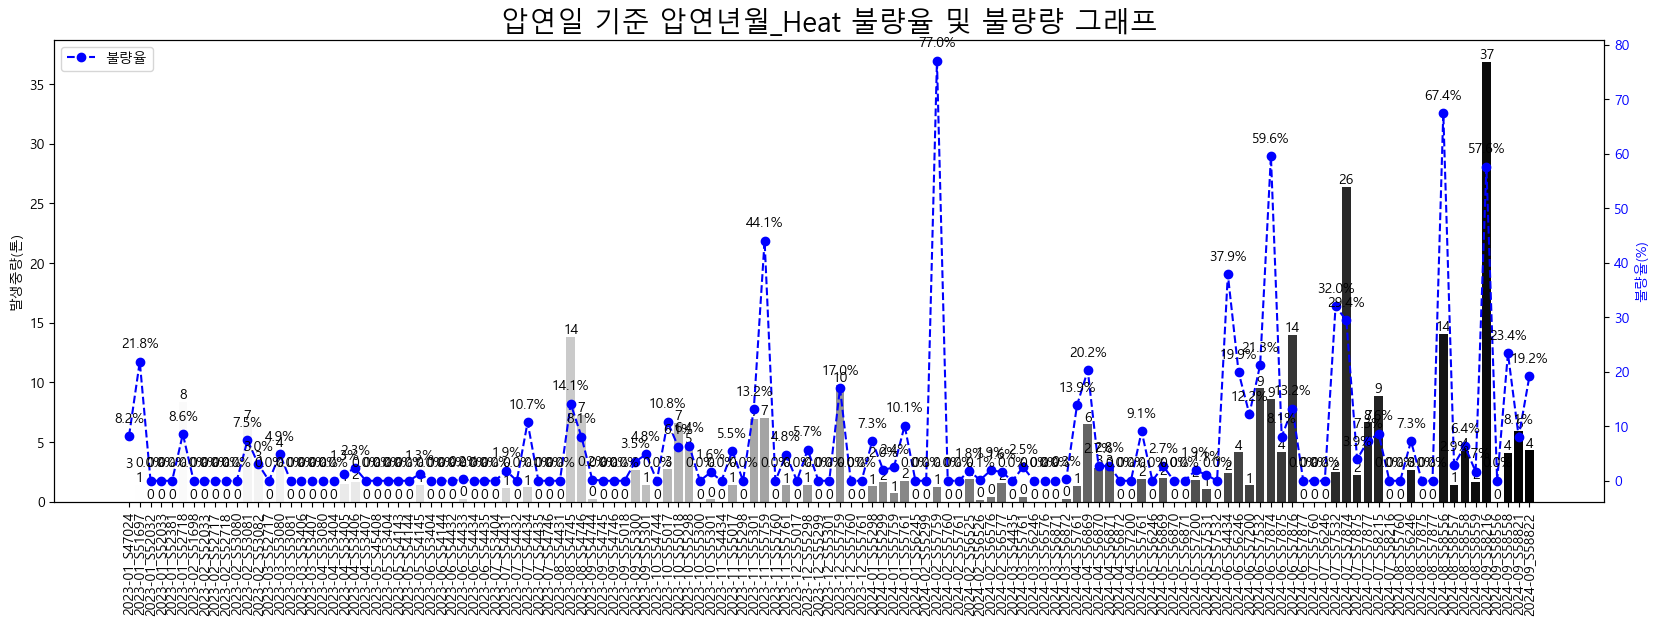

In [46]:
#불량율 그래프(2)
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

# Set font for Korean characters
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 한글 폰트 파일 경로를 입력해주세요
font_name = font_manager.FontProperties(fname=font_path).get_name() # 폰트 이름 얻어오기
rc('font', family=font_name) # 그래프에 한글 폰트 적용하기

# 1. 데이터 준비
x = merged_df3['압연년월_Heat']
y1 = merged_df3['불량율']
y2 = merged_df3['발생중량']


# 2. 기본 스타일 및 그래프 그리기
fig = plt.figure(figsize=(20,6)) ## Figure 생성 
fig.set_facecolor('white') ## Figure 배경색 지정
ax1 = fig.add_subplot() ## axes 생성
 
colors = sns.color_palette('Greys', len(x)) ## 바 차트 색상
 
xtick_label_position = list(range(len(x))) ## x축 눈금 라벨이 표시될 x좌표
ax1.set_xticks(xtick_label_position) ## x축 눈금 
ax1.set_xticklabels(x, rotation=90) ## x축 눈금 라벨
ax1.bar(xtick_label_position, y2, color=colors) ## 바차트 출력
ax1.set_ylabel('발생중량(톤)')  # ax1에 y축 라벨 추가
 
color = 'blue'
ax2 = ax1.twinx() ## 새로운 axis 생성
ax2.plot(xtick_label_position, y1, color=color, linestyle='--', marker='o', label ='불량율') ## 선 그래프 
ax2.tick_params(axis='y', labelcolor=color) ## 눈금 라벨 색상 지정
ax2.set_ylabel('불량율(%)', color=color)

# Combine legends for both axes
lines, labels = ax2.get_legend_handles_labels()
bars = ax1.patches
plots = lines + [bars[0]]  # Adding the first bar patch to the legend for clarity
ax1.legend(plots, labels, loc='upper left')

# 불량중량 값을 바 위에 표시
for i, val in enumerate(y2):
    ax1.annotate(f'{val:.0f}', (xtick_label_position[i], val), textcoords="offset points", xytext=(0, 5), ha='center', va='center')

# 불량율 값을 선 위에 표시
for i, val in enumerate(y1):
    ax2.annotate(f'{val:.1f}%', (xtick_label_position[i], val), textcoords="offset points", xytext=(0, 10), ha='center')
 
plt.title('압연일 기준 압연년월_Heat 불량율 및 불량량 그래프', fontsize=20)
plt.show()